In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from common.nord_mpl import set_palette, NORD_COLORBLIND

## Import Data

In [2]:
schema_dependence = pd.read_parquet("./data/outputs/schema_dependence/schema_dependence_classification.parquet")
sufficient_specification = pd.read_parquet("./data/outputs/sufficient_specification/sufficient_query_specification_classification.parquet")

## Analyze Schema Dependence

In [3]:
schema_dependence_stat_mapping = []

for dataset in schema_dependence["dataset"].unique():
    dataset_subset = schema_dependence[schema_dependence["dataset"] == dataset]
    schema_dependence_stat_mapping.append({
        "Dataset": dataset,
        "Schema Dependence": 1-dataset_subset["schema_independent"].mean(),
        "Structural References": dataset_subset["final_structural_reference"].mean(),
        "Value References": dataset_subset["value_reference_binary"].mean(),
        "Container References": dataset_subset["final_container_reference"].mean()
    })
schema_dependence_stats_df = pd.DataFrame(schema_dependence_stat_mapping)

In [4]:
schema_dependence_stats_df.sort_values(by="Schema Dependence", ascending=False, inplace=True)
schema_dependence_stats_df

,Dataset,Schema Dependence,Structural References,Value References,Container References
3,DA-Eval,0.700389,0.626459,0.019455,0.252918
10,QTSumm,0.630000,0.620000,0.038000,0.026000
2,DA-Code,0.592000,0.166000,0.038000,0.508000
13,TableBench,0.346000,0.242000,0.016000,0.232000
9,OpenWikiTables,0.316000,0.232000,0.080000,0.098000
7,MMQA,0.300000,0.204000,0.208000,0.002000
6,KramaBench,0.277778,0.175926,0.101852,0.175926
11,Spider,0.272000,0.260000,0.056000,0.014000
0,BIRD,0.260000,0.212000,0.136000,0.006000
12,TabMWP,0.198000,0.000000,0.016000,0.196000


In [8]:
schema_dependence_stats_df["Data-Privileged"] = schema_dependence_stats_df["Schema Dependence"]
schema_dependence_stats_df = schema_dependence_stats_df[["Dataset", "Data-Privileged", "Structural References", "Value References", "Container References"]]
schema_dependence_stats_df

,Dataset,Data-Privileged,Structural References,Value References,Container References
3,DA-Eval,0.700389,0.626459,0.019455,0.252918
10,QTSumm,0.630000,0.620000,0.038000,0.026000
2,DA-Code,0.592000,0.166000,0.038000,0.508000
13,TableBench,0.346000,0.242000,0.016000,0.232000
9,OpenWikiTables,0.316000,0.232000,0.080000,0.098000
7,MMQA,0.300000,0.204000,0.208000,0.002000
6,KramaBench,0.277778,0.175926,0.101852,0.175926
11,Spider,0.272000,0.260000,0.056000,0.014000
0,BIRD,0.260000,0.212000,0.136000,0.006000
12,TabMWP,0.198000,0.000000,0.016000,0.196000


In [9]:
plt.style.use(["science", "vibrant"])
set_palette("colorblind")

['#5E81AC', '#D08770', '#EBCB8B', '#8FBCBB']

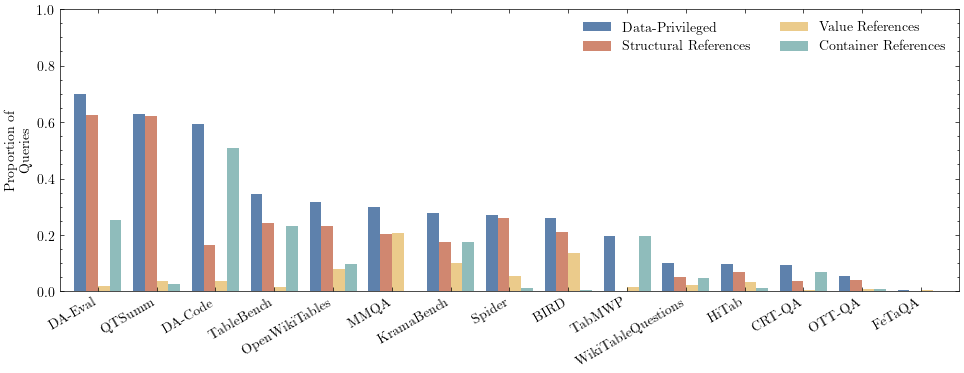

In [10]:
cm = 1/2.54

figsize=((25)*cm, 10*cm)

fig, ax = plt.subplots(figsize=figsize)
schema_dependence_stats_df.plot(ax=ax, x="Dataset", kind="bar", stacked=False, width=0.8)
plt.ylabel("Proportion of\nQueries")
plt.xlabel(None)
plt.ylim(0,1)
plt.xticks(rotation=30, ha="right", minor=False)
ax.tick_params(axis="x", which="major", length=3, width=0.5)
ax.tick_params(axis="x", which="minor", length=0, width=0)
plt.legend(loc="upper right", ncol=2)
plt.tight_layout()
plt.savefig("./plots/schema_dependence/schema_dependence_by_dataset.pdf", format="pdf", bbox_inches="tight")
plt.show()

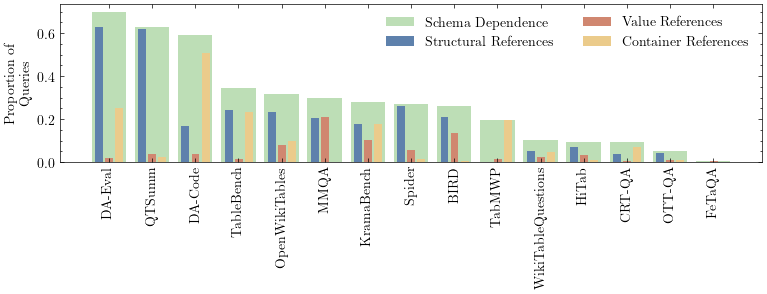

In [9]:
import numpy as np

cm = 1/2.54

figsize=((20)*cm, 8*cm)

full_bar_width = 0.8
inner_margin = 0.05
bar_width = (full_bar_width - 5*inner_margin)/3

x = np.arange(len(schema_dependence_stats_df))

multiplier = 0

fig, ax = plt.subplots(figsize=figsize)

rects = ax.bar(x, schema_dependence_stats_df["Schema Dependence"], width=full_bar_width, label="Schema Dependence", color="#bddeb6")

offset = -1.5 * bar_width + inner_margin
for attribute in ["Structural References", "Value References", "Container References"]:
    rects = ax.bar(x + offset, schema_dependence_stats_df[attribute], width=bar_width, label=attribute)
    offset += bar_width + inner_margin

# plt.legend(loc="upper right")
ax.set_xticks(np.arange(len(schema_dependence_stats_df)), schema_dependence_stats_df["Dataset"], rotation=90, ha="center")
ax.tick_params(axis="x", which="minor", length=0, width=0)
plt.legend(loc="upper right", ncol=2)
plt.ylabel("Proportion of\nQueries")
plt.tight_layout()
plt.show()

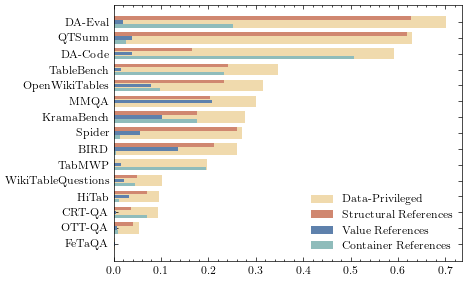

In [13]:
cm = 1 / 2.54
figsize = (10.476 * (7/6) * cm, 7.5 * cm) # Width can be small, height depends on items. Adjust as needed.

plt.rcParams.update({'font.size': 8}) # Set default font size to 8pt

full_bar_height = 0.5
inner_margin = 0.03 # A smaller margin can make it look tighter
bar_height = (full_bar_height - 2 * inner_margin) / 3

y_pos = np.arange(len(schema_dependence_stats_df)) * 0.7

fig, ax = plt.subplots(figsize=figsize)

# Background bar
ax.barh(y_pos, schema_dependence_stats_df["Schema Dependence"], height=full_bar_height,
        label="Data-Privileged", color=NORD_COLORBLIND[2], alpha=0.7, zorder=1)

# --- 2. Corrected Positioning Logic & Explicit Colors ---
attributes = ["Structural References", "Value References", "Container References"]
colors = [NORD_COLORBLIND[1], NORD_COLORBLIND[0], NORD_COLORBLIND[3]] # Orange, Dark Blue, Light Blue
num_attributes = len(attributes)

# Calculate offsets to center the group of bars
# For 3 bars, the offsets from the center will be [-1, 0, 1] * step
group_center_offsets = np.arange(num_attributes) - (num_attributes - 1) / 2.0
step = bar_height + inner_margin

for i, (attribute, color) in enumerate(zip(attributes, colors)):
    offset = group_center_offsets[i] * step
    ax.barh(y_pos + offset, schema_dependence_stats_df[attribute], height=bar_height,
            label=attribute, color=color, zorder=2) # zorder keeps inner bars on top

# --- 3. Ticks, Labels, and Layout ---
ax.set_yticks(y_pos, schema_dependence_stats_df["Dataset"])
ax.invert_yaxis() # To display the highest value at the top

#ax.set_xlabel("Proportion of Queries")
ax.set_ylabel("") # No need for a y-axis title
ax.set_xlim(0, schema_dependence_stats_df["Schema Dependence"].max() * 1.05) # Add 5% padding to x-axis

# Place legend in a good spot and fix typo
ax.legend(loc="lower right", frameon=False) # 'frameon', not 'Frameon'

ax.tick_params(axis="y", which="minor", length=0, width=0)

plt.tight_layout()
plt.savefig("./plots/schema_dependence/schema_dependence_by_dataset_bar.pdf", format="pdf")
plt.show()

## Analyze Sufficient Specification

In [14]:
sufficient_specification.head(10)

,query,dataset,id,entity_specification,entity_specification_analysis,temporal_specification,temporal_specification_analysis,domain_specification,domain_specification_analysis,task_specification,task_specification_analysis,scope_specification,scope_specification_analysis,sufficient_entity_specification,sufficient_temporal_specification,sufficient_domain_specification,sufficient_task_specification,sufficient_scope_specification
0,List the ID of all images with objects that ha...,BIRD,0,Underspecified,"Core entities like ""images,"" their ""ID,"" ""obje...",Not Applicable,No temporal aspect is implied or required; thi...,Underspecified (Ambiguous),The contextual boundary (which dataset/corpus ...,Specified,The user requests a concrete operation: produc...,Underspecified,"The filtering criterion ""objects that have mul...",False,True,False,True,False
1,How many stores belong to the most windy station?,BIRD,1,Underspecified,"Core entities are ambiguous: ""stores"" (which c...",Underspecified (Ambiguous),"""Most windy"" requires a time horizon (e.g., da...",Underspecified (Ambiguous),No geographical or organizational boundary is ...,Specified,The query requests a count of stores tied to a...,Underspecified,The method to identify the “most windy” statio...,False,False,False,True,False
2,What are the names of the establishments that ...,BIRD,2,Underspecified,"Core entities are unclear: ""establishments"" is...",Underspecified (Ambiguous),"""For 4 consecutive years"" is not anchored to s...",Underspecified (Ambiguous),"No geographic, organizational, or program boun...",Specified,The query asks to list (retrieve) the names of...,Specified,The condition is sufficiently precise: an esta...,False,False,False,True,True
3,"On 10/20/2014, what is the duration of the fas...",BIRD,3,Specified,Core entities are clearly identified: a specif...,Specified,Time frame is explicitly given as 10/20/2014. ...,Specified,The contextual boundary is the bike-share doma...,Specified,Find the minimum-duration (fastest) trip on th...,Specified,Procedure: (1) Filter trips to those with star...,True,True,True,True,True
4,Give the code of the airport described as Drif...,BIRD,4,Specified,The query explicitly identifies a unique entit...,Not Applicable,Airport codes are stable identifiers and not t...,Specified,The domain is clearly within global aviation/a...,Specified,The user asks to return the airport code for a...,Underspecified,"""Code"" is ambiguous (could be IATA, ICAO, or F...",True,True,True,True,False
5,"Among the sets in the block ""Ice Age"", how man...",BIRD,5,Specified,"""Block 'Ice Age'"" strongly indicates the Magic...",Not Applicable,The presence of an Italian translation for a s...,Specified,"The terminology of ""block"" and ""sets"" combined...",Specified,The query requests a count of items: number of...,Specified,The steps are straightforward: filter sets by ...,True,True,True,True,True
6,Calculate ratio between the highest unit cost ...,BIRD,6,Underspecified,"The query mentions ""unit cost"" and asks for hi...",Underspecified (Ambiguous),No timeframe is given. Unit costs are time-var...,Underspecified (Ambiguous),There is no contextual boundary (which company...,Specified,The user asks to compute a ratio comparing ext...,Underspecified,Ambiguity exists about the ratio’s direction (...,False,False,False,True,False
7,In which country can I find the circuit with t...,BIRD,7,Underspecified,"""Circuit"" is ambiguous: it could mean a motors...",Specified,The query is a superlative (“with the highest ...,Underspecified (Ambiguous),"No contextual boundary is provided (e.g., Form...",Specified,The user requests identifying the country that...,Specified,The method is straightforward: rank circuits b...,False,True,False,True,True
8,Among the employees working as Sales Represent...,BIRD,8,Underspecified,Core entity 'employees' is not tied to any org...,Underspecified (Assuming Recency),No time frame given; phrased in present tense ...,Underspecified (Amb

In [15]:
sufficient_specification["fully_specified"] = sufficient_specification.apply(lambda row: all([row["sufficient_entity_specification"], row["sufficient_temporal_specification"], row["sufficient_domain_specification"], row["sufficient_scope_specification"], row["sufficient_task_specification"]]), axis=1)
sufficient_specification["data_specified"] = sufficient_specification.apply(lambda row: all([row["sufficient_entity_specification"], row["sufficient_temporal_specification"], row["sufficient_domain_specification"]]), axis=1)
sufficient_specification["procedurally_specified"] = sufficient_specification.apply(lambda row: all([row["sufficient_scope_specification"], row["sufficient_task_specification"]]), axis=1)
sufficient_specification["analysis_specified"] = sufficient_specification.apply(lambda row: all([row["sufficient_entity_specification"], row["sufficient_temporal_specification"], row["sufficient_domain_specification"], row["sufficient_task_specification"]]), axis=1)

In [16]:
sufficient_specification.apply(lambda row: all([row["sufficient_task_specification"], row["data_specified"]]) and not row["sufficient_scope_specification"], axis=1)

0       False
1       False
2       False
3       False
4        True
        ...  
6860    False
6861    False
6862    False
6863    False
6864    False
Length: 6865, dtype: bool

In [17]:
sufficient_specification_stat_mapping = []

for dataset in sufficient_specification["dataset"].unique():
    dataset_subset = sufficient_specification[sufficient_specification["dataset"] == dataset]
    sufficient_specification_stat_mapping.append({
        "Dataset": dataset,
        "Unambiguous": dataset_subset["fully_specified"].mean(),
        "Data Specified": dataset_subset["data_specified"].mean(),
        "Procedurally Specified": dataset_subset["procedurally_specified"].mean(),
        #"Analysis Specified": dataset_subset["analysis_specified"].mean(),
    })

sufficient_specification_stats_df = pd.DataFrame(sufficient_specification_stat_mapping)
sufficient_specification_stats_df.sort_values(by="Unambiguous", ascending=False, inplace=True)
sufficient_specification_stats_df

,Dataset,Unambiguous,Data Specified,Procedurally Specified
4,FeTaQA,0.526000,0.620000,0.800000
9,OpenWikiTables,0.496000,0.586000,0.750000
8,OTT-QA,0.478000,0.504000,0.888000
1,CRT-QA,0.224000,0.372000,0.532000
6,KramaBench,0.222222,0.287037,0.722222
5,HiTab,0.172000,0.220000,0.680000
14,WikiTableQuestions,0.170000,0.198000,0.820000
0,BIRD,0.154000,0.168000,0.774000
11,Spider,0.116000,0.128000,0.872000
13,TableBench,0.110000,0.134000,0.614000


In [18]:
sufficient_specification_stats_df["Unambiguous"].mean()

np.float64(0.1946379017149445)

In [19]:
sufficient_specification_stats_df = sufficient_specification_stats_df.set_index("Dataset").loc[schema_dependence_stats_df["Dataset"]].reset_index()

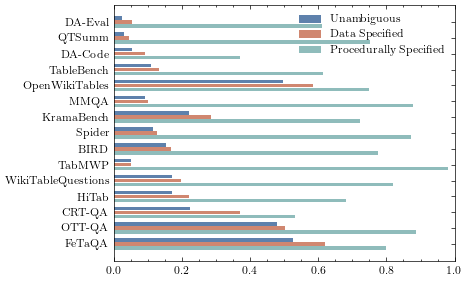

In [20]:
cm = 1 / 2.54
figsize = (10.476 * (7/6) * cm, 7.5 * cm) # Width can be small, height depends on items. Adjust as needed.

plt.rcParams.update({'font.size': 8}) # Set default font size to 8pt

full_bar_height = 0.5
inner_margin = 0.03 # A smaller margin can make it look tighter
bar_height = (full_bar_height - 2 * inner_margin) / 3

y_pos = np.arange(len(sufficient_specification_stats_df)) * 0.7

fig, ax = plt.subplots(figsize=figsize)

# --- 2. Corrected Positioning Logic & Explicit Colors ---
attributes = ["Unambiguous", "Data Specified", "Procedurally Specified"]
colors = [NORD_COLORBLIND[0], NORD_COLORBLIND[1], NORD_COLORBLIND[3]] # Orange, Dark Blue, Light Blue
num_attributes = len(attributes)

# Calculate offsets to center the group of bars
# For 3 bars, the offsets from the center will be [-1, 0, 1] * step
group_center_offsets = np.arange(num_attributes) - (num_attributes - 1) / 2.0
step = bar_height + inner_margin

for i, (attribute, color) in enumerate(zip(attributes, colors)):
    offset = group_center_offsets[i] * step
    ax.barh(y_pos + offset, sufficient_specification_stats_df[attribute], height=bar_height,
            label=attribute, color=color, zorder=2) # zorder keeps inner bars on top

# --- 3. Ticks, Labels, and Layout ---
ax.set_yticks(y_pos, sufficient_specification_stats_df["Dataset"])
ax.invert_yaxis() # To display the highest value at the top

#ax.set_xlabel("Proportion of Queries")
ax.set_ylabel("") # No need for a y-axis title
ax.set_xlim(0, 1) # Add 5% padding to x-axis

# Place legend in a good spot and fix typo
ax.legend(loc="upper right", frameon=False) # 'frameon', not 'Frameon'

ax.tick_params(axis="y", which="minor", length=0, width=0)

#ax.axes.set_yticklabels([])


plt.tight_layout()
plt.savefig("./plots/sufficient_specification/sufficient_specification_by_dataset.pdf", format="pdf")
plt.show()

In [149]:
sufficient_specification_stats_df

,Dataset,Unambiguous,Data Specified,Procedurally Specified
0,DA-Eval,0.023346,0.054475,0.610895
1,QTSumm,0.030000,0.044000,0.752000
2,DA-Code,0.054000,0.092000,0.372000
3,TableBench,0.110000,0.134000,0.614000
4,OpenWikiTables,0.496000,0.586000,0.750000
5,MMQA,0.092000,0.102000,0.878000
6,KramaBench,0.222222,0.287037,0.722222
7,Spider,0.116000,0.128000,0.872000
8,BIRD,0.154000,0.168000,0.774000
9,TabMWP,0.052000,0.052000,0.980000


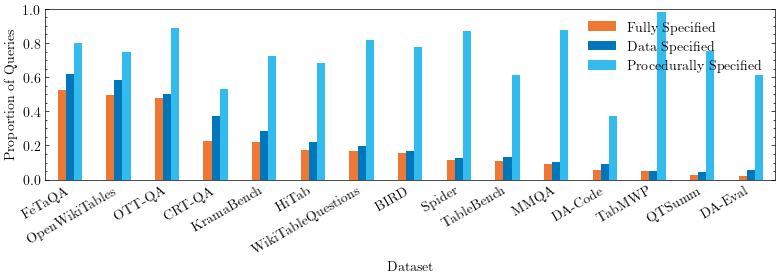

In [67]:
fig, ax = plt.subplots(figsize=(8,3))
sufficient_specification_stats_df.plot(ax=ax, x="Dataset", kind="bar", stacked=False)
plt.ylabel("Proportion of Queries")
plt.ylim(0,1)
plt.xticks(rotation=30, ha="right", minor=False)
ax.tick_params(axis="x", which="major", length=0, width=0)
ax.tick_params(axis="x", which="minor", length=0, width=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("./plots/sufficient_specification/sufficient_specification_by_dataset.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [63]:
sufficient_specification_stat_mapping = []

for dataset in sufficient_specification["dataset"].unique():
    dataset_subset = sufficient_specification[sufficient_specification["dataset"] == dataset]
    sufficient_specification_stat_mapping.append({
        "Dataset": dataset,
        "Fully Specified": dataset_subset["fully_specified"].mean(),
        "Data Specified": dataset_subset["data_specified"].mean(),
        "Entity Specified": dataset_subset["sufficient_entity_specification"].mean(),
        "Temporal Specified": dataset_subset["sufficient_temporal_specification"].mean(),
        "Domain Specified": dataset_subset["sufficient_domain_specification"].mean(),
        "Procedurally Specified": dataset_subset["procedurally_specified"].mean(),
        "Intent Specified": dataset_subset["sufficient_task_specification"].mean(),
        "Methodology Specified": dataset_subset["sufficient_scope_specification"].mean(),
    })

sufficient_specification_stats_df = pd.DataFrame(sufficient_specification_stat_mapping)
sufficient_specification_stats_df.sort_values(by="Fully Specified", ascending=False, inplace=True)
sufficient_specification_stats_df

,Dataset,Fully Specified,Data Specified,Entity Specified,Temporal Specified,Domain Specified,Procedurally Specified,Intent Specified,Methodology Specified
4,FeTaQA,0.526000,0.620000,0.692000,0.864000,0.804000,0.800000,0.900000,0.820000
9,OpenWikiTables,0.496000,0.586000,0.672000,0.844000,0.846000,0.750000,0.918000,0.762000
8,OTT-QA,0.478000,0.504000,0.558000,0.872000,0.910000,0.888000,0.994000,0.890000
1,CRT-QA,0.224000,0.372000,0.552000,0.628000,0.512000,0.532000,0.976000,0.532000
6,KramaBench,0.222222,0.287037,0.407407,0.731481,0.453704,0.722222,0.990741,0.722222
5,HiTab,0.172000,0.220000,0.488000,0.578000,0.392000,0.680000,0.972000,0.684000
14,WikiTableQuestions,0.170000,0.198000,0.340000,0.586000,0.360000,0.820000,0.992000,0.822000
0,BIRD,0.154000,0.168000,0.296000,0.658000,0.298000,0.774000,1.000000,0.774000
11,Spider,0.116000,0.128000,0.256000,0.570000,0.236000,0.872000,0.990000,0.874000
13,TableBench,0.110000,0.134000,0.264000,0.590000,0.258000,0.614000,0.948000,0.614000


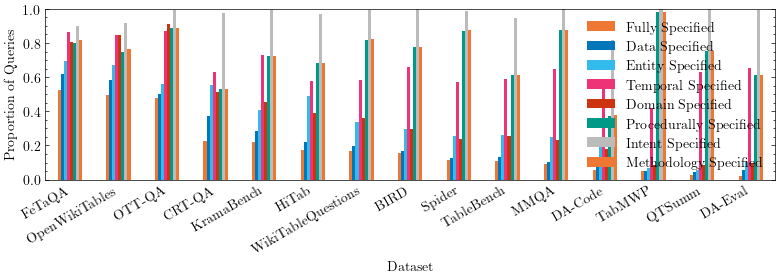

In [65]:
fig, ax = plt.subplots(figsize=(8,3))
sufficient_specification_stats_df.plot(ax=ax, x="Dataset", kind="bar", stacked=False)
plt.ylabel("Proportion of Queries")
plt.ylim(0,1)
plt.xticks(rotation=30, ha="right", minor=False)
ax.tick_params(axis="x", which="major", length=0, width=0)
ax.tick_params(axis="x", which="minor", length=0, width=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("./plots/sufficient_specification/sufficient_specification_by_dataset_fine.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [7]:
sufficient_specification[~sufficient_specification["analysis_specified"]].groupby("dataset").sample(10)

,query,dataset,id,entity_specification,entity_specification_analysis,temporal_specification,temporal_specification_analysis,domain_specification,domain_specification_analysis,task_specification,...,scope_specification_analysis,sufficient_entity_specification,sufficient_temporal_specification,sufficient_domain_specification,sufficient_task_specification,sufficient_scope_specification,fully_specified,data_specified,procedurally_specified,analysis_specified
411,How many students are advised to teach by a pr...,BIRD,411,Underspecified,"Core entities like 'students', 'a professor', ...",Underspecified (Ambiguous),No time frame is given. The count would vary b...,Underspecified (Ambiguous),The organizational context (which university/d...,Specified,...,"The filtering condition is ambiguous: ""advised...",False,False,False,True,False,False,False,False,False
220,"For the repository with '8094' watchers , how ...",BIRD,220,Underspecified,"The core entity ""the repository with '8094' wa...",Underspecified (Ambiguous),Watcher and solution counts are time-varying. ...,Specified,"""Repository"" with ""watchers"" strongly implies ...",Specified,...,"Filter repositories where watchers == 8094, th...",False,False,True,True,True,False,False,True,False
498,What percentage of businesses in the Northwest...,BIRD,498,Specified,"Core entity is the broad class ""businesses"" wi...",Underspecified (Ambiguous),No time frame is given for the forecast. Forec...,Underspecified (Ambiguous),"""Northwest US"" is ambiguous (could mean Pacifi...",Specified,...,Method is implicit and standard: define numera...,True,False,False,True,True,False,False,True,False
20,How long is the Yelp business No. 15098 opened...,BIRD,20,Underspecified,"""Yelp business No. 15098"" is not a globally re...",Underspecified (Assuming Recency),Business hours can change over time and no dat...,Specified,The context is clearly within Yelp (Yelp busin...,Specified,...,The method is straightforward: retrieve Monday...,False,True,True,True,True,False,False,True,False
176,Please calculate the average total price of sh...,BIRD,176,Specified,Core entities are broad but well-defined class...,Underspecified (Ambiguous),No time frame is given. The average could be o...,Underspecified (Ambiguous),The query does not specify the organizational/...,Specified,...,Scope is clear: filter orders to those that ar...,True,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6774,how many medals have sweden and norway won com...,WikiTableQuestions,6774,Specified,Sweden and Norway are uniquely identifiable so...,Underspecified (Ambiguous),No time frame is given; could mean all-time to...,Underspecified (Ambiguous),The context for 'medals' is missing—could be O...,Specified,...,The calculation is straightforward: take the m...,True,False,False,True,True,False,False,True,False
6482,what is the name of the oldest map/catalog?,WikiTableQuestions,6482,Underspecified,"The core entity ""oldest map/catalog"" is ambigu...",Specified,"The superlative ""oldest"" implies an all-time s...",Underspecified (Ambiguous),"No contextual boundary is given. For ""map"" one...",Specified,...,"""Oldest"" implies selecting the minimum by crea...",False,True,False,True,True,False,False,True,False
6855,what are the number of league apps ted davis has?,WikiTableQuestions,6855,Underspecified,"""Ted Davis"" is a common name with multiple pla...",Underspecified (Assuming Recency),No time frame is given. For a count of career ...,Underspecified (Ambiguous),"""League apps"" suggests sports (likely soccer/f...",Specified,...,This is a simple lookup of a single field (lea...,False,True,False,True,True,False,False,True,False
6589,how many members were party of lower west prov...,WikiTableQuestions,6589,Underspecified,"Core entities are ambiguous: ""members"" of what...",Underspecified (Ambiguous),"Past tense (""were"") implies a historical count...",Underspecifi

In [40]:
sqale = pd.read_parquet("/home/daniel/Downloads/train-00001-of-00002.parquet")

In [42]:
sqale

,schema,question,query,token_count,num_joins,commands,num_tables,number_of_columns
0,CREATE TABLE order_tb_product ( id_product I...,Provide the descriptions of all products that ...,SELECT ds_product FROM order_tb_product WHERE ...,"{'question': 11, 'query': 12, 'schema': 84, 't...",0,[SELECT],4,14
1,CREATE TABLE question_relation ( group_quest...,Provide the count of distinct user feedback en...,"SELECT user_id, feedback_type, CO...","{'question': 22, 'query': 18, 'schema': 3152, ...",0,[SELECT],104,407
2,CREATE TABLE Customer ( uid TEXT NOT NULL UN...,List all customer uids who have a default paym...,SELECT c.uid FROM Customer c JOIN PaymentMetho...,"{'question': 21, 'query': 37, 'schema': 2499, ...",2,[SELECT],92,410
3,CREATE TABLE user ( user_id Int NOT NULL UNI...,Identify the top 3 user interests associated w...,"SELECT ui.interest, COUNT(*) AS unvie...","{'question': 26, 'query': 53, 'schema': 1527, ...",3,[SELECT],46,202
4,CREATE TABLE query_info ( id TEXT NOT NULL U...,What is the total number of scheduled queries ...,WITH saved_users AS ( SELECT DISTINCT u...,"{'question': 42, 'query': 72, 'schema': 2234, ...",2,"[WITH, SELECT]",68,314
...,...,...,...,...,...,...,...,...
8825,CREATE TABLE datamodel_join_dataclass_to_impor...,For each data class in the 'Sales Dashboard' r...,WITH sales_dashboard_config AS ( SELECT id...,"{'question': 28, 'query': 77, 'schema': 4618, ...",3,"[WITH, SELECT]",149,784
8826,CREATE TABLE EMPLOYEE ( EmployeeID Int NOT N...,Show the average number of customer complaints...,SELECT AVG(complaint_count) AS AverageComplain...,"{'question': 14, 'query': 41, 'schema': 5246, ...",2,[SELECT],153,718
8827,CREATE TABLE listbuku ( id Int NOT NULL UNIQ...,What are the names and addresses of the librar...,"SELECT DISTINCT lb.branch_name, lb.address FRO...","{'question': 26, 'query': 59, 'schema': 2417, ...",4,[SELECT],68,274
8828,CREATE TABLE newswebsitedatabase_authority ( ...,"Okay, let's see. I need to generate 5 diverse ...","SELECT u.email, sa.saved_date FROM newswebsite...","{'question': 34, 'query': 13, 'schema': 3671, ...",1,[SELECT],120,605


In [46]:
sqale["query_len"] = sqale["query"].apply(len)
sqale.sort_values("query_len")

,schema,question,query,token_count,num_joins,commands,num_tables,number_of_columns,query_len
7710,CREATE TABLE t1 ( t1_id Integer NOT NULL UNI...,List the top three most frequent comments in t...,SELECT 'A';,"{'question': 25, 'query': 2, 'schema': 1301, '...",0,[SELECT],35,171,11
8100,CREATE TABLE api_key_permissions ( id Char N...,List the users who have the highest number of ...,-- Final Answer;,"{'question': 38, 'query': 3, 'schema': 8915, '...",0,[],212,1435,16
4621,CREATE TABLE zizhifiles_configurations ( con...,List the total number of active projects for e...,-- Final answer;,"{'question': 57, 'query': 3, 'schema': 3105, '...",0,[],88,645,16
7008,CREATE TABLE lizenz ( lizenz_id Decimal NOT ...,List all wettkampf events that have at least t...,-- Final Answer;,"{'question': 48, 'query': 3, 'schema': 730, 't...",0,[],27,152,16
7114,CREATE TABLE messages ( id Integer NOT NULL ...,Identify the top 5 users with the most offline...,-- would go here;,"{'question': 75, 'query': 4, 'schema': 5318, '...",0,[],107,511,17
...,...,...,...,...,...,...,...,...,...
2968,CREATE TABLE country ( country_id Int NOT NU...,Identify the top three cities with the highest...,-- CTE to get dominant language per city withi...,"{'question': 32, 'query': 260, 'schema': 2441,...",9,"[WITH, SELECT]",96,317,2527
2500,CREATE TABLE fsraiDatabase_LOCATION ( ID Int...,Find all pairs of members who have co-presente...,WITH co_presenters AS ( SELECT s1...,"{'question': 92, 'query': 255, 'schema': 6502,...",11,"[WITH, SELECT]",181,907,2601
8580,CREATE TABLE Professor ( ssn Char NOT NULL U...,"For each department, identify the professor wi...",-- Step 1: Identify the professor per departme...,"{'question': 59, 'query': 308, 'schema': 3900,...",8,"[WITH, SELECT]",109,483,2734
4929,CREATE TABLE event_tags ( event_id Int NOT N...,Identify all event categories where the averag...,WITH avg_ratings_per_category AS ( SELECT ...,"{'question': 56, 'query': 236, 'schema': 5507,...",10,"[WITH, SELECT]",156,712,2850


In [47]:
sqale["question_len"] = sqale["question"].apply(len)
sqale.sort_values("question_len")

,schema,question,query,token_count,num_joins,commands,num_tables,number_of_columns,query_len,question_len
32,CREATE TABLE persona ( id Integer NOT NULL U...,B,"SELECT persona.nombres, persona.apellidos FROM...","{'question': 1, 'query': 29, 'schema': 273, 't...",3,[SELECT],8,36,278,1
8372,CREATE TABLE users ( id TEXT NOT NULL UNIQUE...,"u.email,",SELECT u.email FROM users u LEFT JOIN login_at...,"{'question': 1, 'query': 21, 'schema': 2442, '...",1,[SELECT],61,308,119,8
1298,CREATE TABLE mydb_rungroup ( id Int NOT NULL...,mydb_bin,SELECT COUNT(*) FROM mydb_bin WHERE number = 3;,"{'question': 1, 'query': 9, 'schema': 1051, 't...",0,[SELECT],36,161,47,8
6043,CREATE TABLE users ( id BigInt NOT NULL UNIQ...,<Answer2>,SELECT COUNT(*) FROM post_comments WHERE user_...,"{'question': 1, 'query': 9, 'schema': 6039, 't...",0,[SELECT],156,714,57,9
1318,CREATE TABLE users ( id BigInt NOT NULL UNIQ...,<Answer1>,"SELECT post_id, COUNT(*) AS total_comments FRO...","{'question': 1, 'query': 11, 'schema': 6039, '...",0,[SELECT],156,714,79,9
...,...,...,...,...,...,...,...,...,...,...
93,CREATE TABLE veranstaltung ( veranstaltung_i...,"First, let's check the tables. The main tables...","SELECT v.veranstaltung_id, v.veranstaltung_nam...","{'question': 125, 'query': 28, 'schema': 6759,...",3,[SELECT],160,1384,238,842
2131,CREATE TABLE zone_issuer ( issuer_id Integer...,"Okay, let's tackle this problem. The user want...","SELECT a.issuer_id AS issuer1, b.issuer_id AS ...","{'question': 149, 'query': 27, 'schema': 11, '...",2,[SELECT],1,2,185,870
6351,"CREATE TABLE event ( ""key"" Varchar NOT NULL ...","The tables include event, team, match, allianc...","SELECT event_partner.event_key AS key, event_p...","{'question': 133, 'query': 7, 'schema': 3966, ...",0,[SELECT],130,657,85,2418
1133,CREATE TABLE followUps ( id Int NOT NULL UNI...,**<|B|>** **<|B|>** **<|B|>** **<|B|>** **<|B|...,SELECT p.* FROM patients p WHERE p.id IN ( S...,"{'question': 878, 'query': 20, 'schema': 1338,...",1,[SELECT],55,205,147,2925


In [21]:
schema_dependence[schema_dependence["final_container_reference"] & ~schema_dependence["final_structural_reference"] & ~schema_dependence["value_reference_binary"]][["query", "dataset", "final_structural_reference", "final_value_reference", "final_container_reference"]].sample(300)

,query,dataset,final_structural_reference,final_value_reference,final_container_reference
2844,Find the 3-month period with the highest total...,KramaBench,False,False,True
1097,Load the data into the SQLite database 'database.,DA-Code,False,False,True
5586,Kendall is looking at the price of new cell ph...,TabMWP,False,False,True
1341,Develop a prediction model for cirrhosis outco...,DA-Code,False,False,True
3913,Grasellenbach's list lists parishes that had a...,OpenWikiTables,False,False,True
...,...,...,...,...,...
526,How did support for the New Democratic party v...,CRT-QA,False,False,True
1147,Predict whether passengers in test.,DA-Code,False,False,True
6040,What is the average height (in meters) of the ...,TableBench,False,False,True
2700,how much did individuals who completed the cch...,HiTab,False,False,True


In [21]:
schema_dependence[schema_dependence["final_container_reference"]]

,query,dataset,ids,structural_references,structural_analysis,value_references,value_analysis,container_references,container_analysis,final_structural_reference,final_value_reference,final_container_reference,value_reference_binary,schema_independent
118,What is the average processed time of the solu...,BIRD,"[118, 118, 118]","[True, True, True]",[The terms “processed time” and “solution path...,"[False, False, False]",[The query does not cite any internal IDs or s...,"[True, True, True]",[The user explicitly names a GitHub repository...,True,False,True,False,False
235,Which word has the most occurrences within the...,BIRD,"[235, 235, 235]","[False, False, False, False]",[The phrasing is a natural language question a...,"[False, False, False, False]",[The query names a public entity ('Catalan lan...,"[True, False, True, True]",[The user explicitly refers to a specific data...,False,False,True,False,False
467,What is the linearized sequenced of API calls ...,BIRD,"[467, 467, 467]","[True, False, True, True]",[The query uses code/repo-specific terminology...,"[True, True, True, True]",[It includes a specific internal file path val...,"[True, True, True, True]",[The query explicitly references a specific fi...,True,True,True,True,False
507,How many different architectures are supported...,CRT-QA,"[507, 507, 507]","[False, False, False]",[The term 'architectures' is natural technical...,"[False, False, False]","['Windows XP' is a common public product name,...","[True, True, True]",[The phrase 'according to the table' explicitl...,False,False,True,False,False
510,Are there any class d stations in the kslt tab...,CRT-QA,"[510, 510, 510]","[True, True, True]",[The query uses schema-like terms such as 'erp...,"[False, False, False]","[No specific data values, IDs, or unusually fo...","[True, True, True]",[The query explicitly names the data artifact ...,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6796,"amazon is at the top of the chart, but what is...",WikiTableQuestions,"[6796, 6796, 6796]","[False, False, False]","[The phrasing uses generic, natural-language t...","[False, False, False]",['amazon' is a common named entity (a company)...,"[True, True, True]",[The user explicitly refers to 'the chart' and...,False,False,True,False,False
6797,how many operas on this list has at least 3 acts?,WikiTableQuestions,"[6797, 6797, 6797]","[False, False, False]","[Phrasing uses natural domain terms ('operas',...","[False, False, False]",[The numeric threshold '3' is a generic criter...,"[True, True, True]",[The phrase 'on this list' explicitly refers t...,False,False,True,False,False
6798,were the new jersey devils in last place accor...,WikiTableQuestions,"[6798, 6798, 6798]","[False, False, False]",[The phrasing uses natural sports language (“l...,"[False, False, False]",[The query mentions the public entity “New Jer...,"[True, True, True]","[The user explicitly refers to “the chart,” in...",False,False,True,False,False
6832,how many cities from canada are on this list?,WikiTableQuestions,"[6832, 6832, 6832]","[False, False, False]","[The phrasing is natural (""how many cities fro...","[False, False, False]",[The only value mentioned is the country name ...,"[True, True, True]","[The phrase ""this list"" explicitly refers to a...",False,False,True,False,False


In [20]:
~schema_dependence["final_container_reference"]

0       True
1       True
2       True
3       True
4       True
        ... 
6860    True
6861    True
6862    True
6863    True
6864    True
Name: final_container_reference, Length: 6865, dtype: bool